### CATS VS DOGS

### Imports

In [1]:
import numpy as np
from keras.utils import to_categorical
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19
from keras.layers import Dense
from keras.models import Model, load_model
from keras.optimizers import SGD
from keras.losses import SparseCategoricalCrossentropy

### Rearranged the files into directories. 1 directory per class.

In [2]:
#import os
#files = os.listdir("data/images")
#for filename in files:
#    classname = filename.rsplit("_", 1)[0]
#    source = os.path.join("data/images", filename)
#    dest_dir = os.path.join("data/images", classname)
#    destination = os.path.join(dest_dir, filename)
#    print(source, destination)
#    os.makedirs(dest_dir, exist_ok=True)
#    os.rename(source, destination)

### Loading Data.

In [3]:
datagen = ImageDataGenerator(
validation_split=0.2
)

### Create model

In [4]:
baseModel = VGG19(
    weights="imagenet"
)

In [5]:
baseModel.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Make and add our new layer in place of the last layer.

In [6]:
new_layer = Dense(37, activation='softmax', name='Testing')

inp = baseModel.input
out = new_layer(baseModel.layers[-2].output)

model = Model(inp, out)


### Prevent all layers from retraining except the last 3 layers

In [7]:
# Freeze the layers 
for layer in model.layers[:-3]:
    layer.trainable = False

In [8]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

### Generator Construction
In this next section, we created the objects that will seperate the test and training data.

In [9]:
path = "data/images"
targetSize = (224,224)
batchSize = 32
epochs = 10

In [10]:
train_generator = datagen.flow_from_directory(
    path,
    target_size=targetSize,
    batch_size=batchSize,
    class_mode='binary',
    subset='training') # set as training data

Found 5913 images belonging to 37 classes.


In [11]:
validation_generator = datagen.flow_from_directory(
    path, # same directory as training data
    target_size=targetSize,
    batch_size=batchSize,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1477 images belonging to 37 classes.


### Training Time!
Here we trained the model and evaluated it after each epoch.

In [12]:
model.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer=SGD(),
    metrics=["accuracy"],
)

In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batchSize,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batchSize,
    epochs = epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
184/184 [==============================] - 146s 792ms/step - loss: 1.2697 - accuracy: 0.6383 - val_loss: 0.8897 - val_accuracy: 0.7303
Epoch 2/10
184/184 [==============================] - 67s 366ms/step - loss: 0.1681 - accuracy: 0.9464 - val_loss: 0.7551 - val_accuracy: 0.7806
Epoch 3/10
184/184 [==============================] - 58s 315ms/step - loss: 0.0168 - accuracy: 0.9973 - val_loss: 0.7347 - val_accuracy: 0.8139
Epoch 4/10
184/184 [==============================] - 58s 315ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.7291 - val_accuracy: 0.8145
Epoch 5/10
184/184 [==============================] - 58s 317ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7466 - val_accuracy: 0.8152
Epoch 6/10
184/184 [==============================] - 58s 317ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.7570 - val_accuracy: 0.8125
Epoch 7/10
184/184 [==============================] -

## Saving model
We save the model here so that we do not have to re-train the model every time that we want to use it.

In [14]:
model.save('Model Saves/CvD V1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Model Saves/CvD V1\assets


* https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/
* https://keras.io/api/preprocessing/image/#flowfromdirectory-method
* https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
* https://keras.io/api/applications/vgg/
* https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
* https://keras.io/api/preprocessing/#image-data-preprocessing
* https://stackoverflow.com/questions/41378461/how-to-use-models-from-keras-applications-for-transfer-learnig/41386444#41386444
* https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator

### Loading the Model
Here we load the model that we have saved in previous executions of this notebook.

In [15]:
model = load_model('model saves/CvD V1')

### Evalutaion Time
Although we evaluated using the model.fit_generator function above, we wanted to get a another look to confirm our accuracy. We did this by printing the output of model.evaluate().

In [16]:
loss , acc = model.evaluate(validation_generator, verbose=1)
print('> %.3f' % (acc * 100.0))

47/47 [==============================] - 12s 249ms/step - loss: 0.7839 - accuracy: 0.0325
> 3.250


### Heat Map Creation:
This next section allows us to create a heatmap that will show which animals were misclassified the most.

In [17]:
test_generator = datagen.flow_from_directory(
    path, # same directory as training data
    target_size=targetSize,
    batch_size=8,
    shuffle=False,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1477 images belonging to 37 classes.


Batch:  0
Batch:  1
Batch:  2
Batch:  3
Batch:  4
Batch:  5
Batch:  6
Batch:  7
Batch:  8
Batch:  9
Batch:  10
Batch:  11
Batch:  12
Batch:  13
Batch:  14
Batch:  15
Batch:  16
Batch:  17
Batch:  18
Batch:  19
Batch:  20
Batch:  21
Batch:  22
Batch:  23
Batch:  24
Batch:  25
Batch:  26
Batch:  27
Batch:  28
Batch:  29
Batch:  30
Batch:  31
Batch:  32
Batch:  33
Batch:  34
Batch:  35
Batch:  36
Batch:  37
Batch:  38
Batch:  39
Batch:  40
Batch:  41
Batch:  42
Batch:  43
Batch:  44
Batch:  45
Batch:  46
Batch:  47
Batch:  48
Batch:  49
Batch:  50
Batch:  51
Batch:  52
Batch:  53
Batch:  54
Batch:  55
Batch:  56
Batch:  57
Batch:  58
Batch:  59
Batch:  60
Batch:  61
Batch:  62
Batch:  63
Batch:  64
Batch:  65
Batch:  66
Batch:  67
Batch:  68
Batch:  69
Batch:  70
Batch:  71
Batch:  72
Batch:  73
Batch:  74
Batch:  75
Batch:  76
Batch:  77
Batch:  78
Batch:  79
Batch:  80
Batch:  81
Batch:  82
Batch:  83
Batch:  84
Batch:  85
Batch:  86
Batch:  87
Batch:  88
Batch:  89
Batch:  90
Batch:  9

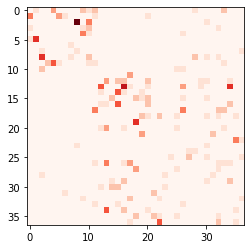

In [18]:
size = 37
wrong = np.zeros((size,size))
wrongPics = np.zeros((size,size),dtype = np.int32)

for batchNum,(xs,ys) in enumerate(test_generator):
    yPredict = model.predict(xs)
    categories = np.argmax(yPredict,axis = 1)
    
    for i, (predicted, actual) in enumerate(zip(categories,ys.astype(np.int32))):
        if predicted != actual:
            wrong[predicted,actual] += 1
            wrongPics[predicted,actual] = i
    print("Batch: ",batchNum)
    if(batchNum > test_generator.samples // 8):
        break
pyplot.imshow(wrong, cmap=pyplot.get_cmap('Reds'))
pyplot.show()

This graph shows that Pitbull Terriers and boxers were most mistaken for each other.

Find the index of the animals that were most mistaken and total incorrect predicitons.

In [19]:
print(np.argmax(wrong)//37)
print(np.argmax(wrong)%37)
print(np.max(wrong))
print(np.sum(wrong))

2
8
9.0
274.0
